## Import to model and read Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.linear_model import Ridge
%matplotlib inline

## Getting rid of missing values without scaling

In [2]:
# Reading in house data
data = pd.read_csv('kc_house_data.csv')

In [ ]:
import seaborn as sns

In [ ]:
# plotting data for visualz
fig = plt.figure(figsize=(12,12));
sns.pairplot(data)

In [4]:
# Droped missing values
clean_data = data.dropna()

In [68]:
# Setting target variable and features
y_drop = clean_data['price']

X_drop = clean_data[['bedrooms', 'waterfront', 'view', 'condition', 'floors', 'bathrooms', 'sqft_living', 'grade', 'sqft_lot', 'sqft_lot15', 'zipcode', 'lat', 'long']]


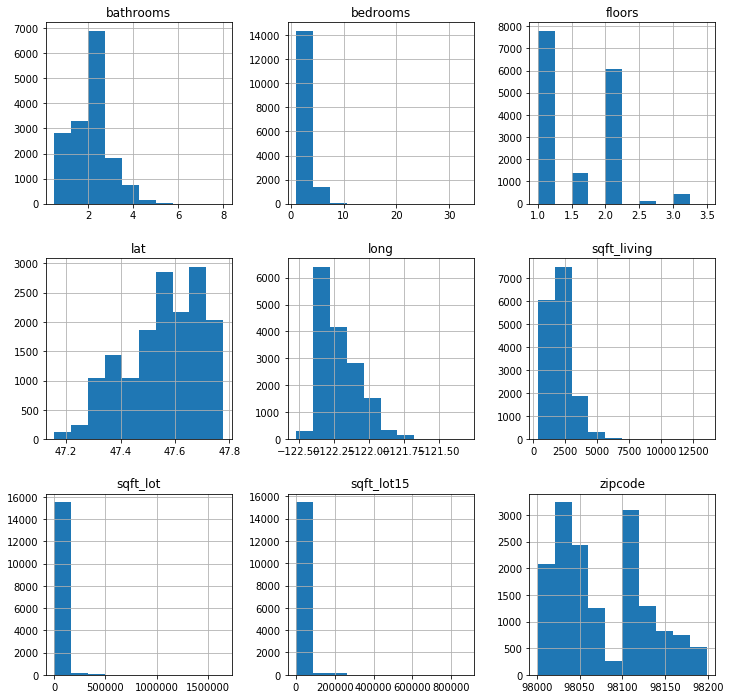

In [5]:
# Visualizing my data
X_drop.hist(figsize=(12,12));

In [69]:
# Splitting my data for modeling
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop, y_drop, random_state=1)

## Ridge modeling on none scaled data

In [70]:
# Setting my ridge model and training un-scaled data
model_ridge = Ridge(alpha=1, normalize=False)

model_ridge.fit(X_train_drop, y_train_drop)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [99]:
# Predicting unseen data
predict = model_ridge.predict(X_test_drop)

print("MAE from the unscaled data:", mean_absolute_error(predict, y_test_drop))
print("R^2 for raw data:", r2_score(y_test_drop, predict))

MAE from the unscaled data: 129993.8235210365
R^2 for raw data: 0.6726355486052447


## Preproccessing of data (droped missing values) and Scaling

In [118]:
# Reading in data again for preproccessing
data = pd.read_csv('kc_house_data.csv')

In [121]:
# Droped na values in the data frame
droped_data = data.dropna()
target = droped_data['price']
# Droped unwanted columns
droped_data.drop(['date', 'id', 'sqft_basement'], axis=1, inplace=True)
# Scaled the columns i was possible gonna use
scaler = RobustScaler()

robust_scaling = scaler.fit_transform(droped_data)

robust_scaled_df = pd.DataFrame(robust_scaling, columns=droped_data.columns)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
# Setting my target variable and features
X = robust_scaled_df[['bedrooms', 'sqft_above', 'view', 'waterfront', 'yr_renovated', 'floors', 'yr_built', 'grade', 'condition', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'zipcode', 'sqft_living15', 'lat', 'long']]


In [124]:
# Splitting data for linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=1)

## Ridge model with scaled data

In [125]:
# Define my ridge model
model = Ridge(alpha=25)

model.fit(X_train, y_train)

Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [126]:
# Coefficients for ridge model with scaled data
model.coef_

array([-3.96303899e+04,  3.80814537e+04,  6.00085497e+04,  4.55229166e+05,
        1.29925703e+01,  4.94282560e+03, -1.20542157e+05,  9.39004759e+04,
        2.89099011e+04,  3.85568878e+04,  1.58922247e+05,  5.81463067e+02,
       -1.65231353e+03, -4.54683790e+04,  2.08908851e+04,  1.25029797e+05,
       -4.34758785e+04])

In [127]:
model.intercept_

442058.5938226251

In [128]:
# Calculating the r^2 for training data
pred = model.predict(X_train)

print("MAE for scaled data:", mean_absolute_error(pred, y_train))
print("Training R^2:", r2_score(y_train, pred))

MAE for scaled data: 126324.52515234744
Training R^2: 0.7014139929953578


In [130]:
# Calculating predictions for unseen data
test_pred = model.predict(X_test)

print("MAE for scaled data:", mean_absolute_error(test_pred, y_test))
print("Test R^2 for scaled data:", r2_score(y_test, test_pred))

MAE for scaled data: 125105.04704522871
Test R^2 for scaled data: 0.6945761032318034
